# Midterm Project - Ion Channels
Ion channels --- PMLS 4.14 and 4.15 (plus data from Dr. Kinder)
by Thomas Moore and Jacob Maier

## Introduction

In this project, Katz and Miledi's ion channel experiments were explored. The format of problems 4.14 and 4.15 from *PMLS* was followed, with complementary data provided by Dr. Kinder. AI was utilized to analyze Figure 4.11 in the *PMLS* textbook and estimate the data points so that the plot could be reproduced and included in problem 4.15.


In the first half of the 20th century, evidence suggested that cell membranes could control their electrical conductance, allowing nerve cells to transmit information. One hypothesis proposed that the cell membrane is impermeable to ions but studded with tiny, discrete gateways. Each gateway, or ion channel, can be opened, allowing a particular type of ion to pass through. This opening and closing enables the cell to control the concentration of different ions inside and outside the cell, which changes the electric potential across the membrane. Additionally, each channel was assumed to open independently of the others, allowing probability theory to be used to predict the contribution of a single channel to the overall polarity of the membrane.


Problems 4.14 and 4.15 in *PMLS* follow the logic of Katz and Miledi's work from 1972 and 1973 to determine the conductance of a single ion channel. This was done long before electronic instruments were capable of directly measuring signals at this scale. Below are the assumptions made to simplify the math in this problem:


- _M_ represents the number of channels and is known to be very large
- $\xi$ represents the percentage of time that a channel remains open
- _l_ represents the number of channels that are open simultaneously
- _a_ represents the change in membrane polarity caused by a single open channel


## 4.14 Discreteness of ion channels

### **Explain why the Poisson distribution applies to this problem, and use it to compute the measurable quantities, the variance and mean, in terms of the parameters of the system.**

- a. _Poisson distribution, mean, and variance_

The Poisson distribution is a good model for the opening and closing of channels because the open state makes up a small fraction of the channel's existence, so the event can be considered "rare." There are numerous channels, but there is a fixed number of them _M_. Since the channel will spend a fixed time open, the probability that the channel is open will be a constant for a specified lifetime or time constraint.

The mean value of the membrane potential will be the resting membrane potential multiplied by the time that the ion channel is closed, summed with the depolarized potential for the times that the ion channel is open. The magnitude for the potential in the depolarized state will be a function of the number of channels that are open, since this changes how much the entire membrane depolarizes from the resting state.

The variance of the distribution will be related to only the opening and closing of channels in the presence of acetylcholine, and will not incorporate the "DC offset" of the depolarized signal. 

$$
V(t)  = V_0 + l(t)a
$$
$$
\langle V \rangle = V_0 + M \xi a
$$
$$
Var(V)= M \xi a^2
$$

The average cell voltage when exposed to ACh is: 84.5mV
The average resting cell voltage is: 93.0mV
The average depolarization is: Δ⟨V⟩ ≈ 8.5mV
The variance of the cell voltage when exposed to ACh is: 1763.8758µV²
The variance of the resting cell voltage is: 543.9075µV²


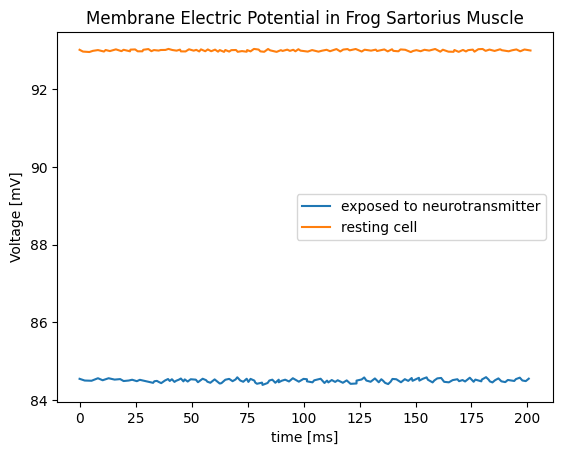

In [52]:
# Import numpy library for math and matplot.lib.pyplot for plotting
import numpy as np
import matplotlib.pyplot as plt

# Create variables for file pathnames to the data sets from Dr. Kinder
exposed_cell_data = "/Users/jacobmaier/All Jacob's Files/Programming/BioPhysics/exposed-cell.csv"
resting_cell_data = "/Users/jacobmaier/All Jacob's Files/Programming/BioPhysics/resting-cell.csv"

# exposed_cell_data = "/Users/toemo/Python Work/exposed-cell.csv"
# resting_cell_data = "/Users/toemo/Python Work/resting-cell.csv"

# Load and delimit the CSV data sets
exposed_cell = np.loadtxt(exposed_cell_data, delimiter=',')
resting_cell = np.loadtxt(resting_cell_data, delimiter=',')

# Time variables set equal to first column of data sets which are ms
time_exposed = exposed_cell[:,0]
time_resting = resting_cell[:,0]

# Plot time variables on x-axis (ms) and voltage data (second column) on y-axis (mV).
plt.plot(time_exposed, exposed_cell[:,1], label="exposed to neurotransmitter")
plt.plot(time_resting, resting_cell[:,1], label="resting cell")
plt.xlabel('time [ms]')     # x-axis label
plt.ylabel('Voltage [mV]')  # y-axis label
plt.legend()                # Create legend with labels in .plot
plt.title("Membrane Electric Potential in Frog Sartorius Muscle")

avg_exposed = np.average(exposed_cell[:,1])           # Find average voltage of ACh exposed channels
avg_resting = np.average(resting_cell[:,1])           # Find average voltage of resting channels
avg_depolarization = np.abs(avg_resting-avg_exposed)  # Find difference between the above two averages
# Print the 3 values calculated above with rounding
print("The average cell voltage when exposed to ACh is: {}mV".format(round(avg_exposed,1)))
print("The average resting cell voltage is: {}mV".format(round(avg_resting,1)))
print("The average depolarization is: Δ⟨V⟩ ≈ {}mV".format(round(avg_depolarization,1)))


var_exposed = np.var(exposed_cell[:,1]) # Find variance in voltage of the ACh exposed channels mV²
var_resting = np.var(resting_cell[:,1]) # Find variance in voltage of resting channels mV²
var_exposed = var_exposed * 1e6    # Convert from mV² to µV²
var_resting = var_resting * 1e6    # Convert from mV² to µV²
# Print the variances rounded
print("The variance of the cell voltage when exposed to ACh is: {}µV²".format(round(var_exposed,4)))
print("The variance of the resting cell voltage is: {}µV²".format(round(var_resting, 4)))

### **Explain why it is legitimate to simply subtract the average and variance of the resting-state signal from that seen in the lower trace.**

- b. _External noise removal_

It makes sense to subtract the average and variance of resting state signal from the depolarized state because this will remove the noise created by processes other than the hypothesis being considered. The removal of the external noise isolates the desired magnitudes so there will be no other variables at play.

In [53]:
# Import numpy library for math and matplot.lib.pyplot for plotting
import numpy as np
import matplotlib.pyplot as plt

# Create variables for file pathnames to the data sets from Dr. Kinder
exposed_cell_data = "/Users/jacobmaier/All Jacob's Files/Programming/BioPhysics/exposed-cell.csv"
resting_cell_data = "/Users/jacobmaier/All Jacob's Files/Programming/BioPhysics/resting-cell.csv"

# exposed_cell_data = "/Users/toemo/Python Work/exposed-cell.csv"
# resting_cell_data = "/Users/toemo/Python Work/resting-cell.csv"

# Load and delimit the CSV data sets
exposed_cell = np.loadtxt(exposed_cell_data, delimiter=',')
resting_cell = np.loadtxt(resting_cell_data, delimiter=',')

avg_exposed = np.average(exposed_cell[:,1])           # Find average voltage of ACh exposed channels
avg_resting = np.average(resting_cell[:,1])           # Find average voltage of resting channels
avg_depolarization = np.abs(avg_resting-avg_exposed)  # Find difference between the above two averages
# Print the 3 values calculated above with rounding
print("The average cell voltage when exposed to ACh is: {}mV".format(round(avg_exposed,1)))
print("The average resting cell voltage is: {}mV".format(round(avg_resting,1)))
print("The average depolarization is: Δ⟨V⟩ ≈ {}mV".format(round(avg_depolarization,1)))



var_exposed = np.var(exposed_cell[:,1]) # Find variance in voltage of the ACh exposed channels mV²
var_resting = np.var(resting_cell[:,1]) # Find variance in voltage of resting channels mV²
var_exposed = var_exposed * 1e6    # Convert from mV² to µV²
var_resting = var_resting * 1e6    # Convert from mV² to µV²
variance_difference = np.abs(var_resting-var_exposed) # Calculate absolute difference between the variances 
# Print the variances rounded
print("The variance of the cell voltage when exposed to ACh is: {}µV²".format(round(var_exposed,4)))
print("The variance of the resting cell voltage is: {}µV²".format(round(var_resting, 4)))
print(f"The difference between the variance of the Resting cell potential and the Exposed potential is: ΔVar(V) ≈{variance_difference: .4f}µV²")

The average cell voltage when exposed to ACh is: 84.5mV
The average resting cell voltage is: 93.0mV
The average depolarization is: Δ⟨V⟩ ≈ 8.5mV
The variance of the cell voltage when exposed to ACh is: 1763.8758µV²
The variance of the resting cell voltage is: 543.9075µV²
The difference between the variance of the Resting cell potential and the Exposed potential is: ΔVar(V) ≈ 1219.9683µV²


### **Show how to deduce the value of _a_ from Katz and Miledi's experimental measurement of the change in the average and the variance of the membrane potential upon acetylcholine application.**

- c. _Contribution of a single channel_

$$
\triangle \langle V \rangle = M \xi a
$$
$$
\triangle Var(V)= M \xi a^2
$$

$$
a = \frac{M \xi a^2}{M \xi a} = \frac{\triangle Var(V)}{\triangle \langle V \rangle} 
$$

In [55]:
# Import numpy library for math and matplot.lib.pyplot for plotting
import numpy as np
import matplotlib.pyplot as plt

# Create variables for file pathnames to the data sets from Dr. Kinder
exposed_cell_data = "/Users/jacobmaier/All Jacob's Files/Programming/BioPhysics/exposed-cell.csv"
resting_cell_data = "/Users/jacobmaier/All Jacob's Files/Programming/BioPhysics/resting-cell.csv"

# exposed_cell_data = "/Users/toemo/Python Work/exposed-cell.csv"
# resting_cell_data = "/Users/toemo/Python Work/resting-cell.csv"

# Load and delimit the CSV data sets
exposed_cell = np.loadtxt(exposed_cell_data, delimiter=',')
resting_cell = np.loadtxt(resting_cell_data, delimiter=',')

avg_exposed = np.average(exposed_cell[:,1])           # Find average voltage of ACh exposed channels
avg_resting = np.average(resting_cell[:,1])           # Find average voltage of resting channels
avg_depolarization = np.abs(avg_resting-avg_exposed)  # Find difference between the above two averages
# Print the average depolarization with rounding
print("The average depolarization is: Δ⟨V⟩ ≈ {}mV".format(round(avg_depolarization,1)))

var_exposed = np.var(exposed_cell[:,1]) # Find variance in voltage of the ACh exposed channels mV²
var_resting = np.var(resting_cell[:,1]) # Find variance in voltage of resting channels mV²
var_exposed = var_exposed * 1e6    # Convert from mV² to µV²
var_resting = var_resting * 1e6    # Convert from mV² to µV²
variance_difference = np.abs(var_resting-var_exposed) # Calculate absolute difference between the variances 
# Print the variances rounded
print(f"The difference between the variance of the Resting cell potential and the Exposed potential is: ΔVar(V) ≈{variance_difference: .4f}µV²")

# Calculate the change in membrane polarity caused by a single open channel
a = variance_difference/(avg_depolarization * 1000)
print("") # make a line space
print("Using the above values, the calculated change in membrane polarity caused by a single open channel (a) is approximately:")
print("a = ΔVar(V)/Δ⟨V⟩")
print("a ≈ {}µV".format(round(a, 4)))

The average depolarization is: Δ⟨V⟩ ≈ 8.5mV
The difference between the variance of the Resting cell potential and the Exposed potential is: ΔVar(V) ≈ 1219.9683µV²

Using the above values, the calculated change in membrane polarity caused by a single open channel (a) is approximately:
a = ΔVar(V)/Δ⟨V⟩
a ≈ 0.1435µV


### **If Katz and Miledi found that the average membrane potential increased by $8.5mV$ and that the variance increased by $(29.2µV)^2$ after application of acetylcholine, what would _a_ be?**

- d. _Data point calculation_

$$
a = \frac{\triangle Var(V)}{\triangle \langle V \rangle} = \frac{(29.2\mu V)^2}{8.5mV}
$$

$$
a = \frac{\triangle Var(V)}{\triangle \langle V \rangle} = \frac{852.64\mu V^2}{8500\mu V}
$$

$$
a \approx 0.1003\mu V
$$

$$
\text{So, the change in membrane polarity caused by a single open channel (a) is about 0.1003µV}
$$

## 4.15 More on ion channels

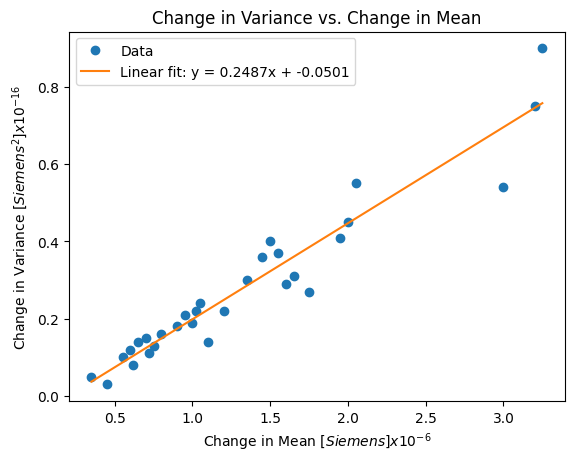

Slope (m)       = 0.2487
Y-Intercept (b) = -0.0501


In [33]:
# Import numpy library for math and matplot.lib.pyplot for plotting
import numpy as np
import matplotlib.pyplot as plt

# Import the CSV file
# Note: these data points are estimates made by AI based on Figure 4.11 in the PMLS Textbook
a_data = r"/Users/jacobmaier/All Jacob's Files/Programming/BioPhysics/figure.csv"

# a_data = r"C:\Users\toemo\Python Work\figure.csv"

# Delimit CSV data
a = np.loadtxt(a_data, delimiter=',')

x = a[:, 0] # x-axis values from column 1 of the .csv file
y = a[:, 1] # y-axis values from column 2 of the .csv file

# np.polyfit takes our x and y axis data and determines the slope (m) and y-intercept (b) values for our y=mx+b line of fit
m, b = np.polyfit(x, y, 1)


x_fit = np.linspace(x.min(), x.max(), 100) # find the x value for our y=mx+b line of fit equation
y_fit = m * x_fit + b # create the y=mx+b line of fit equation

# Plot the data points from the .csv file and the line of fit we created
plt.plot(x, y, 'o', label='Data')
plt.plot(x_fit, y_fit, label=f'Linear fit: y = {m:.4f}x + {b:.4f}')
plt.title("Change in Variance vs. Change in Mean")
plt.xlabel('Change in Mean $[Siemens] x 10^{-6}$')
plt.ylabel('Change in Variance $[Siemens^2] x 10^{-16}$')
plt.legend()
plt.show()

# Print the slope (m) and y-intercept (b) values
print(f"Slope (m)       = {round(m, 4)}")
print(f"Y-Intercept (b) = {round(b, 4)}")

### **What does the general form of the observed relationship between the change in the variance of the conductance and the change in the average of the conductance tell us?**

- a. _Observing relationships_

The linearity of the observed relationship tells us that there is a constant associated with the ratio of the change in variance divided by the change in the mean. More broadly, we can interpret this to mean that there is a direct relationship between adding more acetylcholine, and more change in voltage across the membrane. We can imagine a line of best fit from the origin to the highest point of conductance. Adding more or less acetylcholine will shift the expected number of open channels along this line.


### **What is the average number of open ion channels at the highest conductance shown in the figure? In retrospect, is the Poisson approximation justified here?**


- b. _Calculating a number of open ion channels_

If we assume the line of best fit will go through the origin and the last data point, then the contribution to the membrane potential for a single channel, denoted by "a", will be calculated by the equation derived in the previous problem:

$$
a = \frac{\triangle Var(V)}{\triangle \langle V \rangle}
$$

With a change in variance of $ \approx 1*10^{-16}$, and a change in the mean of $ \approx 4*10^{-6}$, the contribution to the voltage change of a single channel will be:

$$
a \approx \frac{1*10^{-16}}{4*10^{-6}}
$$

$$
a \approx {2.5*10^{-11}}
$$

Since "a" is a constant value for the contribution of a single ion channel to the overall membrane potential, the average amount of change in the membrane potential will be the average number of channels open at one time, multiplied by the value of "a". 

$$
\triangle \langle V \rangle = al
$$

Since the change in in average is $ \triangle \langle V \rangle \approx 4*10^{-6} $, the average number of open ion channels will be:

$$
l = \frac{\triangle \langle V \rangle}{a}
$$

$$
l \approx \frac{4*10^{-6}}{2.5*10^{-11}}
$$

$$
l \approx 160000
$$

Is the Poisson approximation justified? Yes. We can see this through the distribution of points. There is a high number of points concentrated at the lower end of the graph, and the higher end of the graph is more sparse. This is because the number of open channels is a "rare" event that is independent of its other instances, and the number of channels is sufficiently high to not limit this value.

## Summary

The experiment conducted by Katz and Miledi is interesting because it shows how gaps in technology can be bridged with some statistical extrapolation. Without knowledge of the number of trials, other than it being very large, it is difficult to determine the contribution of a single trial to the overall result.

This project was a great example of extracting information about a single event by analyzing statistical trends of many such events. We learned that the change in the mean and variance in a system of numerous contributions can be manipulated to reveal the contribution of a single trial to the overall output. This logic works in this situation because the number of trials is very large, and the events are independent. A Poisson distribution is a good model for this situation since we consider the opening of a particular ion channel to be a rare event, modeled over numerous independent trials.
